# Interpolazione ed approssimazione di dati con polinomi

Mediante interpolazione ed approssimazione polinomiale è possibile approssimare funzioni continue. Ciò ha senso in varie situazioni, ad esempio:
- quando la funzione e' nota analiticamente ma la sua espressione è troppo complessa;
- quando la funzione da approssimare e' nota solo in un insieme finito di punti, ad esempio da misure sperimentali.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp

K_Aint =  35.41195282042359
K_Aint =  904.2959095940893
K_Aint =  25066.91961370836
K_Aint =  819966.6353712423
K_Aint =  30484433.98918351
K_Aint =  1181566170.6424055
K_Aint =  46649924553.62518
K_Aint =  1871589601608.9006
K_Aint =  76121524135851.92
K_Aint =  3129381533258732.5
K_Aint =  1.2974274117321267e+17
K_Aint =  5.416514507519864e+18
K_Aint =  2.2745327718948887e+20
K_Aint =  9.599069335107836e+21
K_Aint =  4.068501001551578e+23


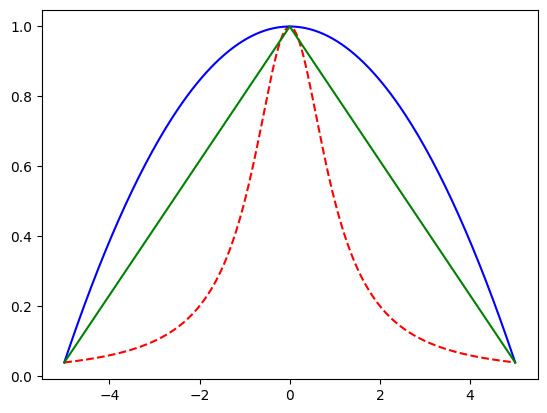

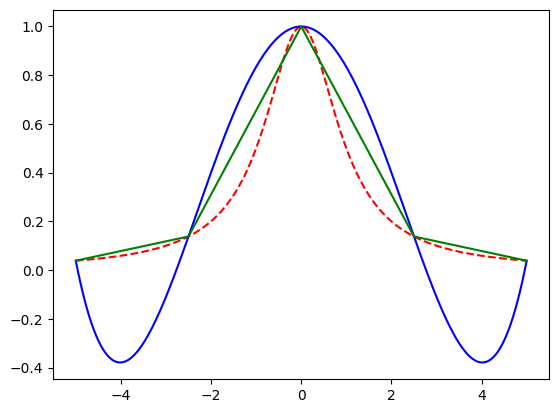

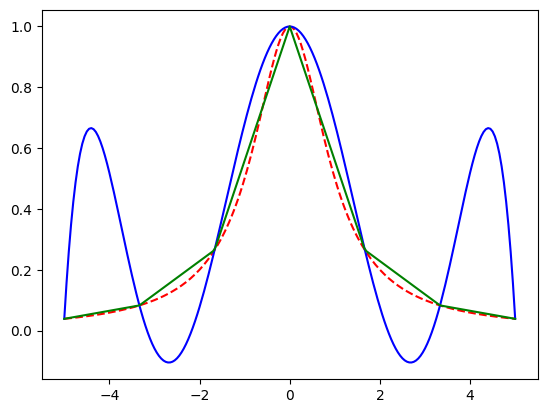

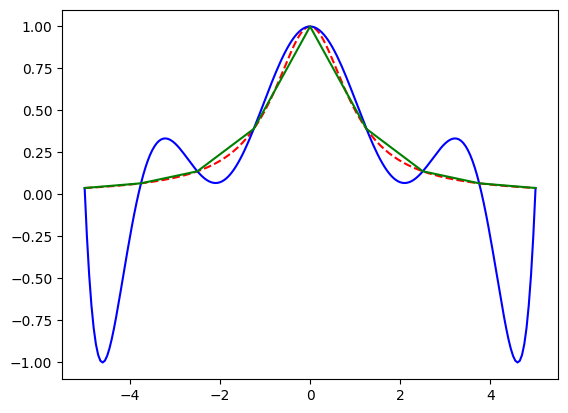

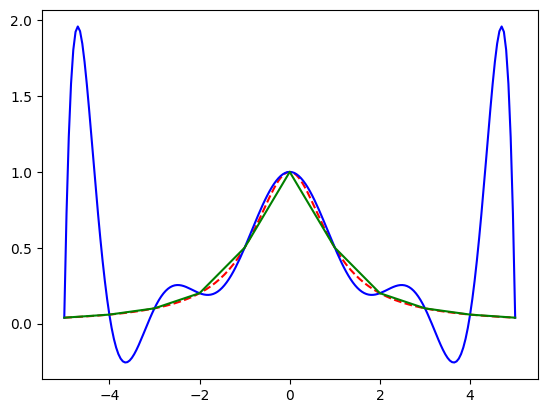

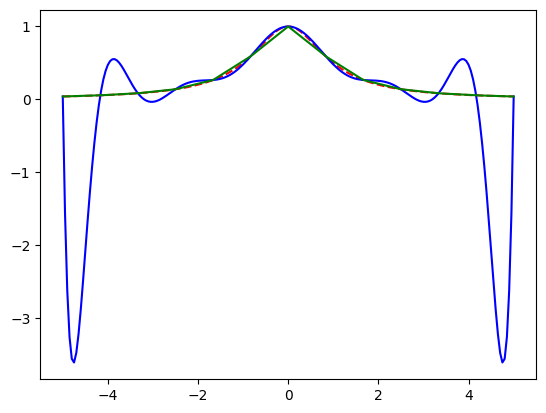

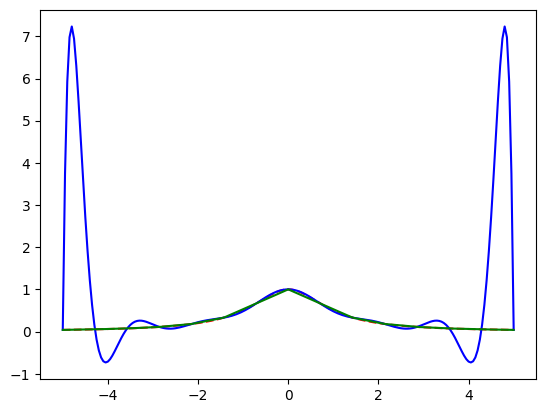

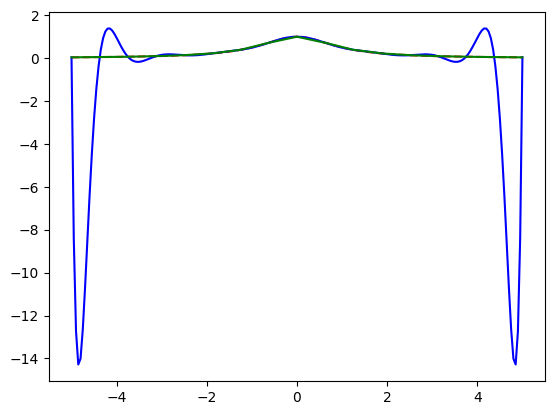

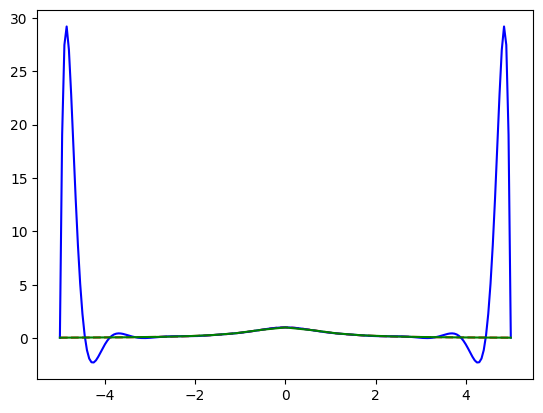

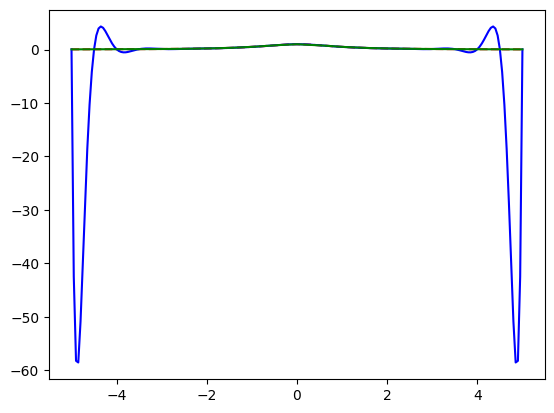

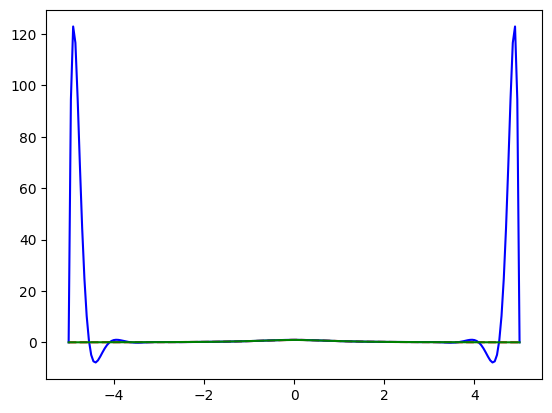

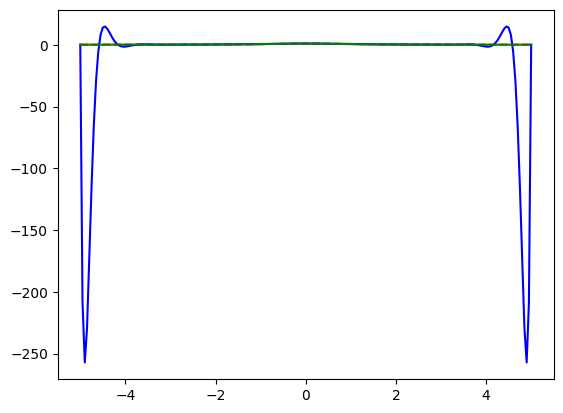

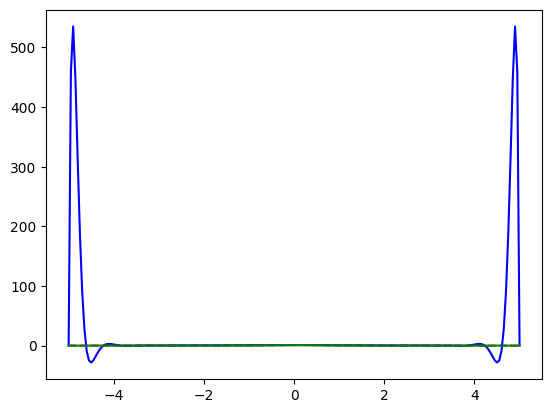

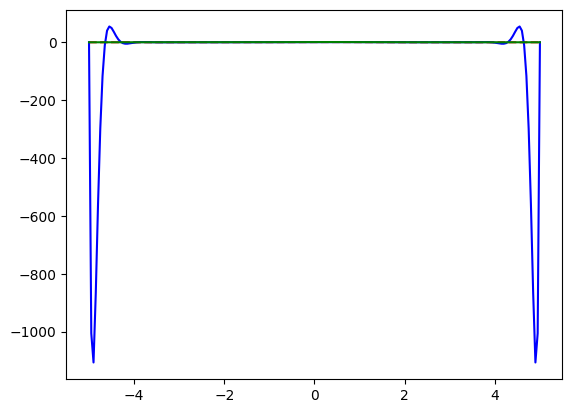

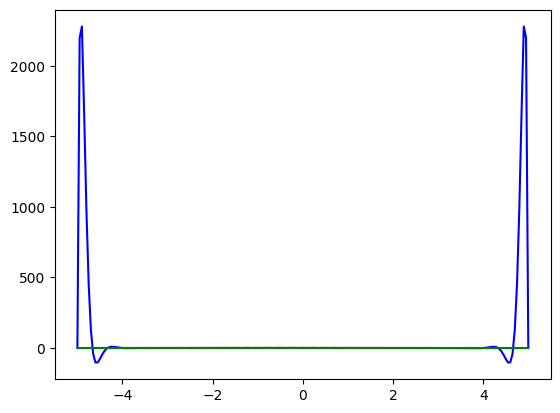

In [2]:
# dato un insieme di punti distinti, troviamo il polinomio interpolante 
# e lo grafichiamo:

# funzione di Runge
f = lambda x: 1./(1.+x**2)

# interpolazione su nodi equispaziati:
for i in range(2,31,2):
    x = np.arange(-5,5.01,0.05)
    plt.figure(i); plt.plot(x,f(x),'r--')
    xint = np.arange(-5,5.01,10.0/i)
    # costruiamo la matrice di Vandermonde:
    A = np.matrix(np.vander(xint),'d')
    # ed andiamo anche a vedere il numero di condizionamento della matrice:
    print("K_Aint = ",np.linalg.cond(A,2))
    c = np.linalg.solve(A,f(xint))
    plt.plot(x,np.polyval(c,x),'b-')
    # vediamo un'interpolazione lineare a tratti con scipy.interpolate:
    f_interp = interp.interp1d(xint,f(xint),'linear')
    plt.plot(x,f_interp(x),'g-')    
#endfor
plt.show()

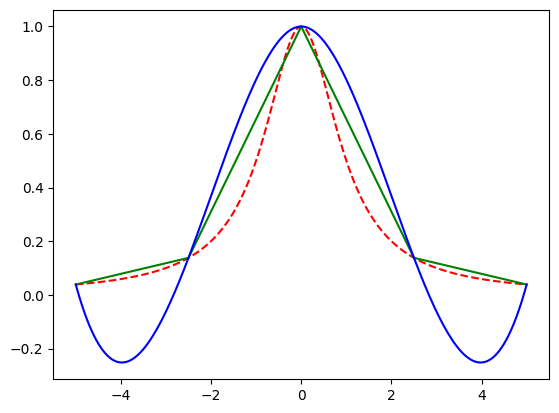

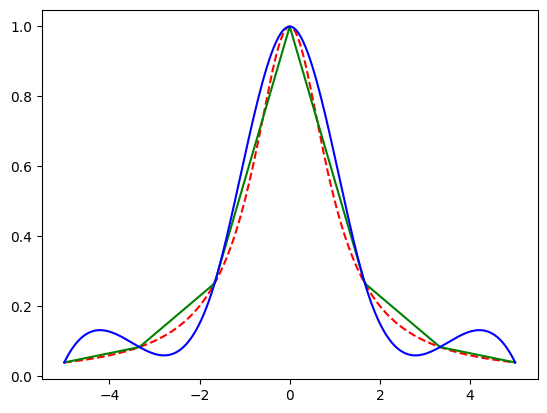

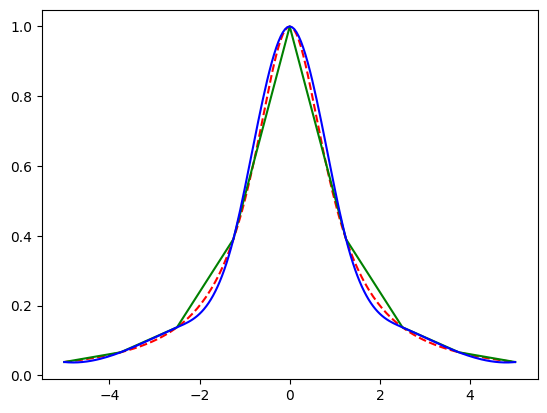

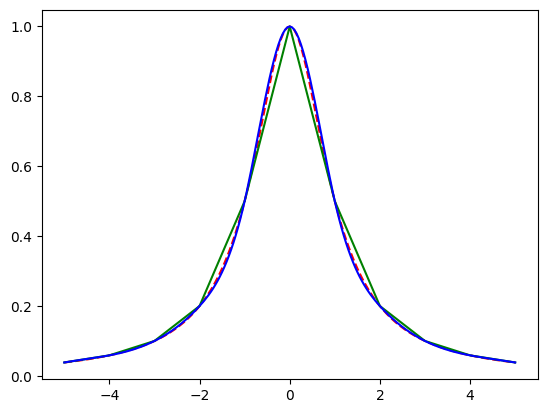

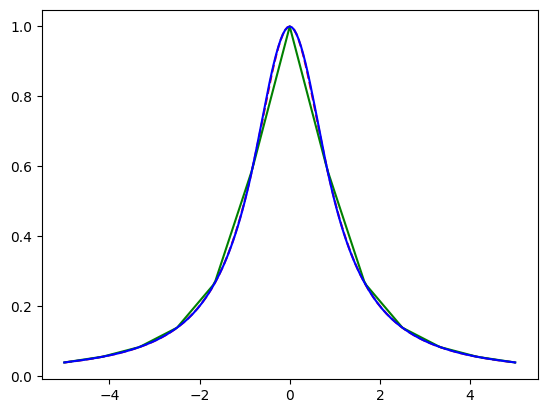

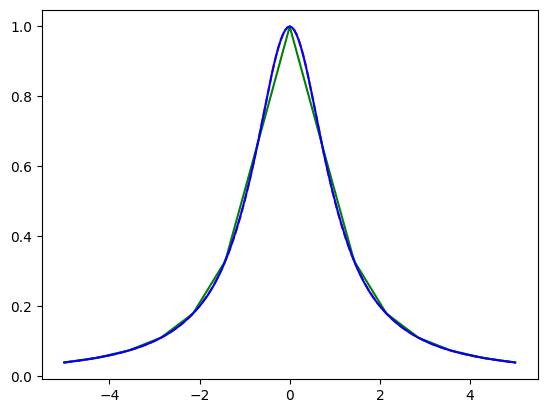

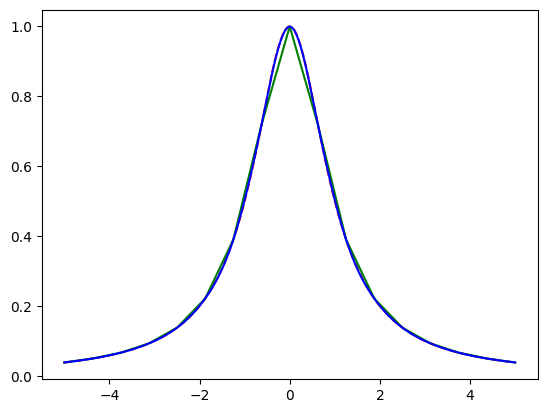

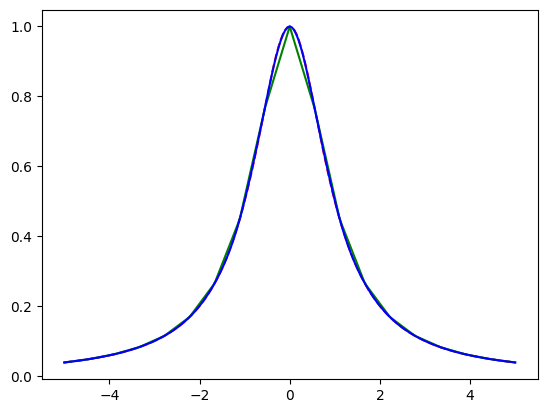

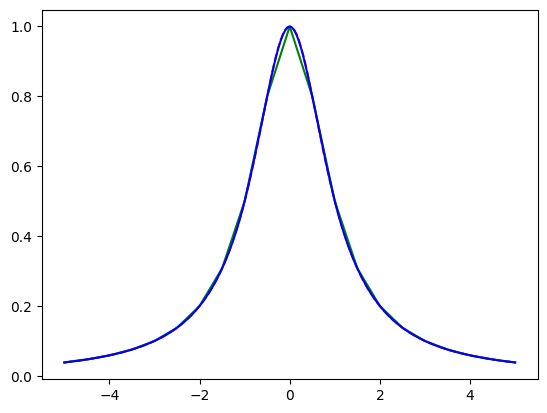

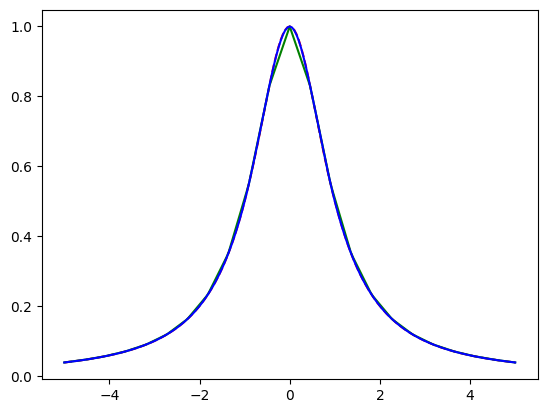

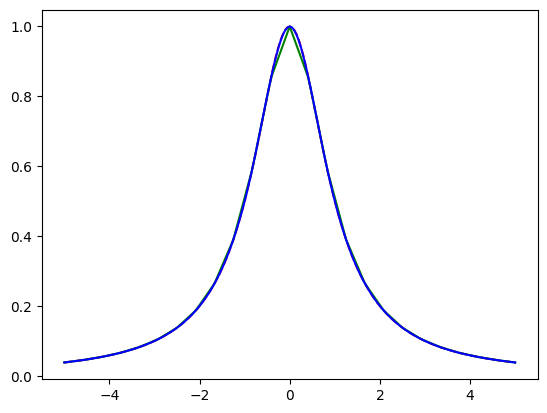

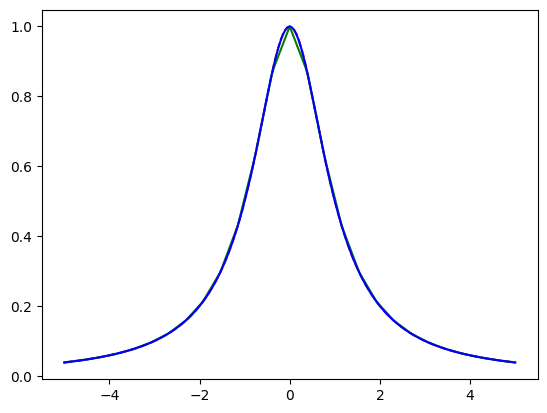

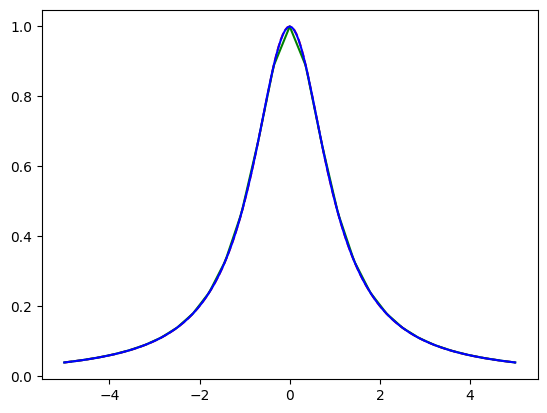

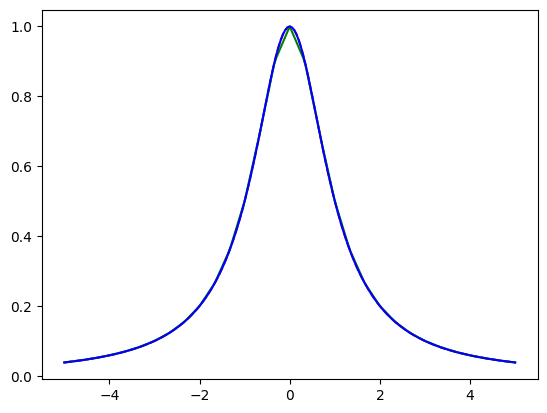

In [3]:
# confronto tra interpolazione lineare a tratti e spline cubica:
for i in range(4,31,2):
    x = np.arange(-5,5.01,0.05)
    plt.figure(i); plt.plot(x,f(x),'r--')
    xint = np.arange(-5,5.01,10.0/i)
    # vediamo un'interpolazione lineare a tratti con scipy.interpolate:
    f_interp = interp.interp1d(xint,f(xint),'linear')
    plt.plot(x,f_interp(x),'g-')    
    # vediamo un'interpolazione spline cubica con scipy.interpolate:
    f_interp = interp.interp1d(xint,f(xint),kind='cubic')
    plt.plot(x,f_interp(x),'b-')    
#endfor
plt.show()

K_Aint =  35.4119528204236
K_Aint =  173.47649429524424
K_Aint =  918.5403411034337
K_Aint =  4689.626216915293
K_Aint =  24811.706166277647
K_Aint =  128500.57862542408
K_Aint =  694916.8059635839
K_Aint =  3684423.0723253526
K_Aint =  20836793.037697464
K_Aint =  118776688.634292
K_Aint =  673715418.9446859
K_Aint =  3972361857.2582
K_Aint =  22767809397.2613
K_Aint =  134449073315.933


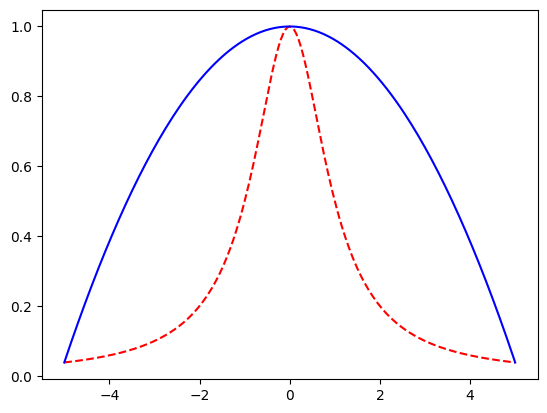

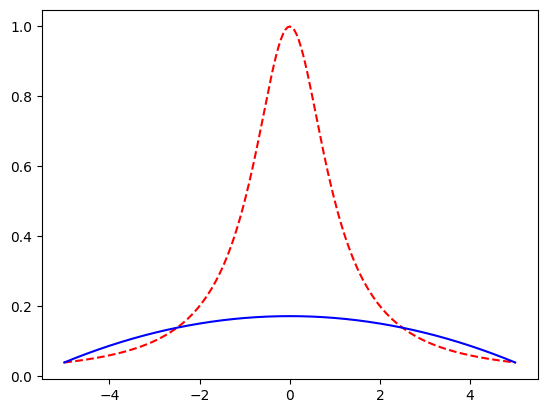

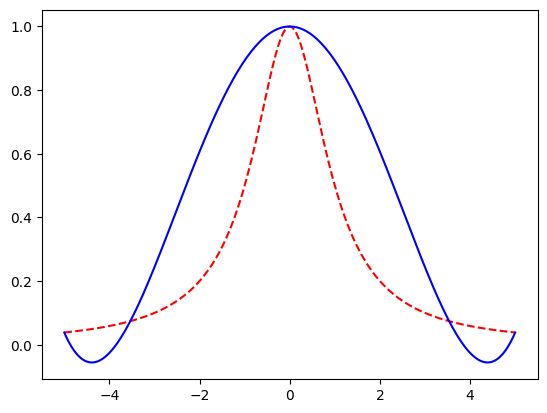

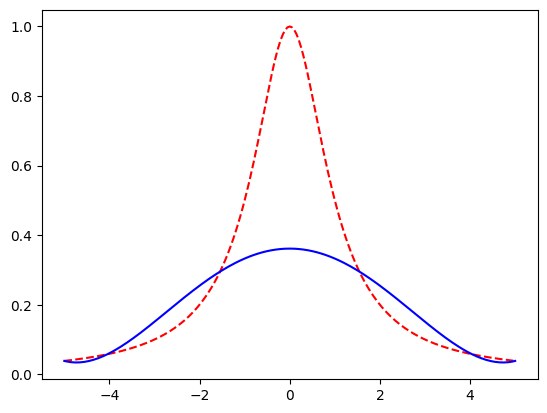

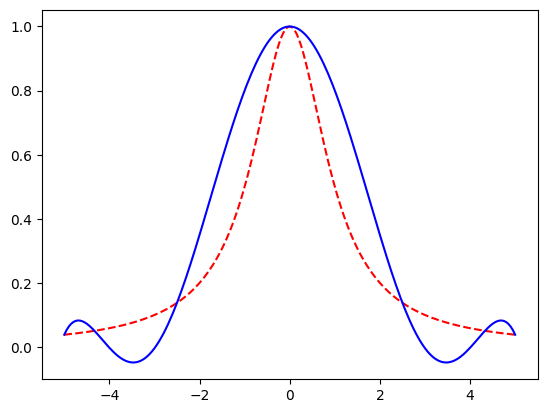

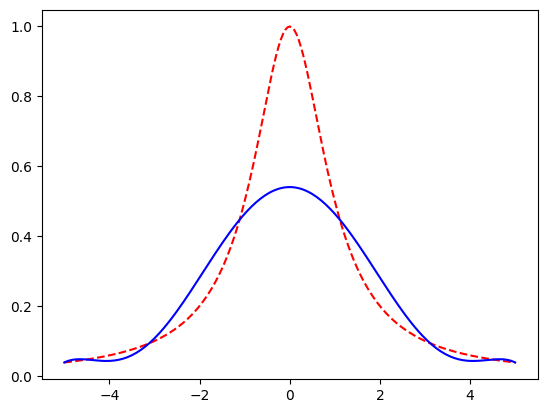

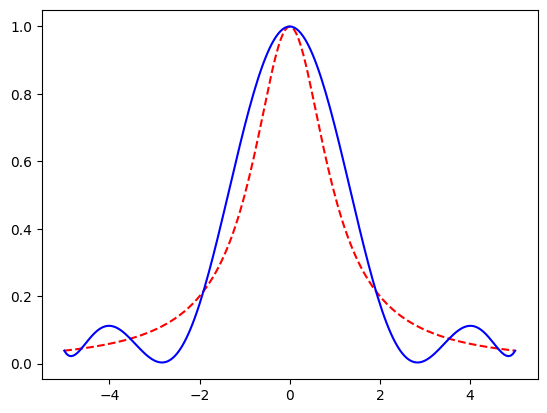

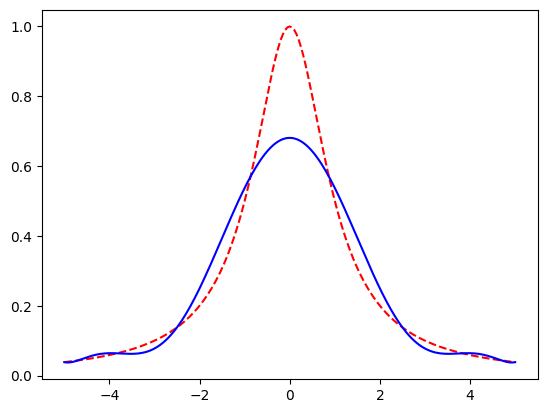

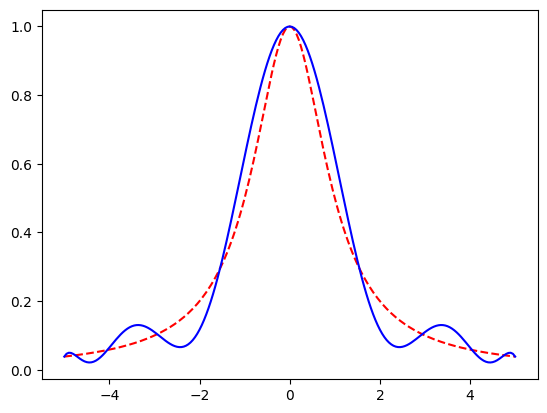

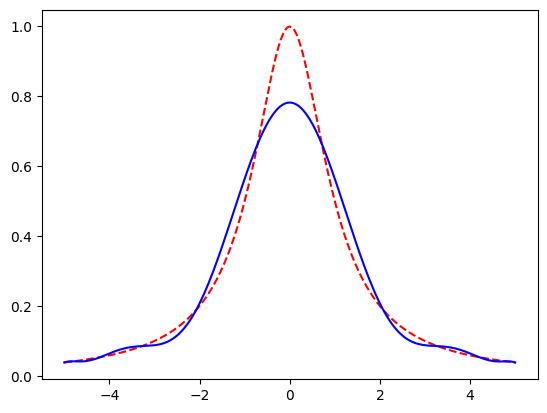

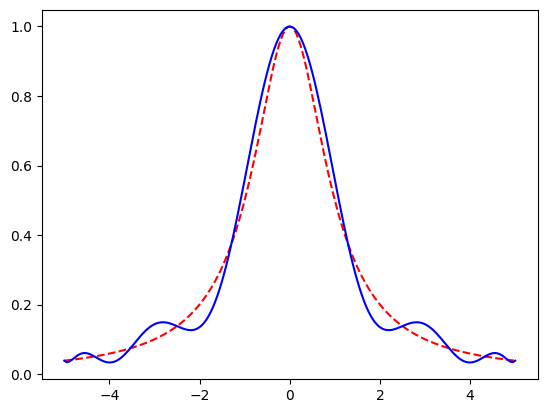

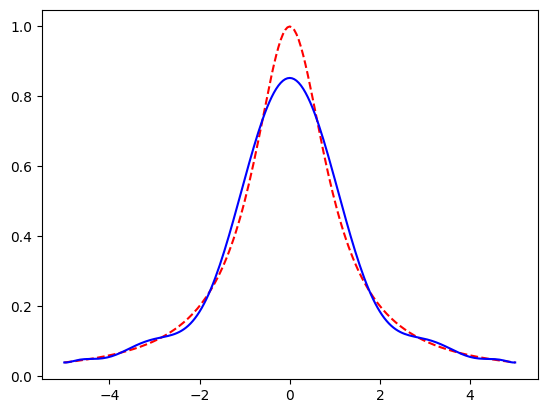

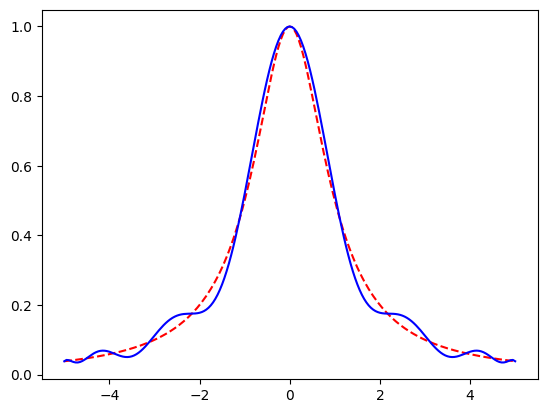

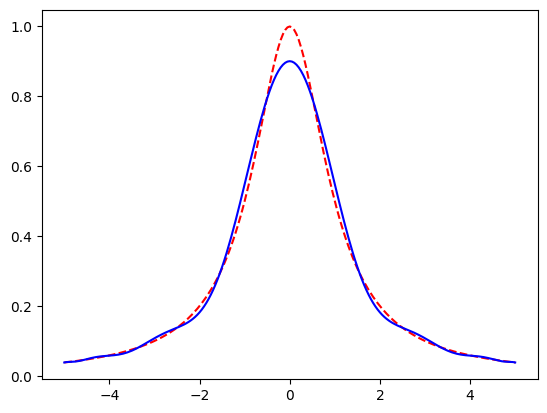

In [4]:
# interpolazione agli zeri di Chebychev:
a=-5.0; b=5.0;
for n in range(2,16):
    x = np.arange(-5,5.01,0.05)
    plt.figure(n); plt.plot(x,f(x),'r--');
    xint = (a+b)/2. - (b-a)/2*np.cos(np.pi*np.arange(0,n+1)/n)
    A = np.matrix(np.vander(xint),'d')  
    print("K_Aint = ",np.linalg.cond(A,2))
    c = np.linalg.solve(A,f(xint))
    plt.plot(x,np.polyval(c,x),'b-')
#endfor
plt.show()

In [5]:
# approssimiamo con un polinomio di grado basso, senza pretendere di passare necessariamente
# per i punti, applicando un'approssimazione ai minimi quadrati:
# confronto tra algoritmi per i minimi quadrati discreti:
coord = np.arange(50.,0.,-1)
nc = len(coord)
# "x_veri" - valori veri dei coefficienti del polinomio che genera i dati osservati:
x_veri = np.array([[2.987654321, 5.987654321, 4.987654321, 1.987654321, 3.987654321, 0.987654321, 2.987654321, 1.987654321]]).T
nx = len(x_veri)
gradopol = 5  # "gradopol" - grado del polinomio che genera i dati osservati:
x_veri = x_veri[range(nx-(gradopol+1),nx)] # NB: prendo solo quelli fino a "gradopol" !

# "A" - matrice di Vandermonde:
A = np.vander(coord)
print("K_Aint = ",np.linalg.cond(A,2))
A = A[:,range(nc-(gradopol+1),nc)]
print("K_Als = ",np.linalg.cond(A,2))
print(" ")

# Calcolo della fattorizzazione QR con il metodo di Gram-Schmidt Modificato :
def MGS(A):
    # INPUT:  A - np.matrix
    m = A.shape[0] 
    n = A.shape[1]  
    Q = np.zeros([m, n])
    R = np.zeros([n, n])
    for j in range(0,n):  # itero sulle colonne
      Q[:,j] = A[:,j];
      for i in range(0,j):
        R[i,j] = Q[:,i].T @ Q[:,j];  # G.S. Modificato
        Q[:,j] = Q[:,j] - R[i,j]*Q[:,i];
        #print('Q[:,', j, '] = ', Q[:,j])
      #endfor
      R[j,j] = np.linalg.norm(Q[:,j]);             # norma 2
      if  R[j,j]==0:  break;  #endif       # significa che c'e' dipendenza lineare.
      Q[:,j] = Q[:,j] / R[j,j];            # Q ha colonne ortogonali e di norma 2 unitaria, e dunque e' ortonormale
    #endfor                                
    return Q,R

# caso di misure perfette :
b = np.atleast_2d(np.polyval(x_veri,coord)).T
Qh,Rh = np.linalg.qr(A.copy())
x1 = np.linalg.solve( Rh , Qh.T @ b )
Qm,Rm = MGS(A.copy())
x2 = np.linalg.solve( Rm , Qm.T @ b )
x3 = np.linalg.solve( A.T @ A , A.T @ b )
print('risultato con misure perfette:')
print((x1-x_veri)/x_veri)
print(" ")
print((x2-x_veri)/x_veri)
print(" ")
print((x3-x_veri)/x_veri)
print(" ")
print("=> QR_Householder e' nettamente il migliore !")

# caso di misure rumorose :
stderr = 1.e-3;
br = np.matrix(np.polyval(x_veri,coord)).T + stderr*np.matrix(np.random.randn(nc,1))
Qh,Rh = np.linalg.qr(A.copy())
x1 = np.linalg.solve( Rh , Qh.T @ br )
Qm,Rm = MGS(A.copy())
x2 = np.linalg.solve( Rm , Qm.T @ br )
x3 = np.linalg.solve( A.T @ A , A.T @ br )
print('risultato con misure rumorose: stderr = ', stderr) 
print((x1-x_veri)/x_veri)
print(" ")
print((x2-x_veri)/x_veri)
print(" ")
print((x3-x_veri)/x_veri)
print(" ")
print("=> per effetto del rumore nelle misure, i tre algoritmi sono adesso equivalenti !")

K_Aint =  6.069333757879976e+90
K_Als =  761242009.2355304
 
risultato con misure perfette:
[[ 8.54761806e-15]
 [-2.70957170e-12]
 [ 5.87758696e-11]
 [-4.06771830e-09]
 [ 8.16103923e-09]
 [-3.36680567e-08]]
 
[[-1.10716584e-11]
 [ 3.47656995e-09]
 [-7.69573765e-08]
 [ 5.81267565e-06]
 [-1.37441574e-05]
 [ 3.62660624e-05]]
 
[[-8.02172586e-11]
 [ 2.58066636e-08]
 [-5.90005439e-07]
 [ 4.66220657e-05]
 [-1.17909664e-04]
 [ 3.46102367e-04]]
 
=> QR_Householder e' nettamente il migliore !
risultato con misure rumorose: stderr =  0.001
[[ 8.94351524e-11]
 [-3.08879276e-08]
 [ 7.71545024e-07]
 [-6.80749632e-05]
 [ 1.98005014e-04]
 [-7.57010587e-04]]
 
[[ 7.83593982e-11]
 [-2.74096610e-08]
 [ 6.94544051e-07]
 [-6.22586900e-05]
 [ 1.84250804e-04]
 [-7.20686570e-04]]
 
[[-4.92414030e-12]
 [-2.20801886e-11]
 [ 5.06258443e-08]
 [-9.46612987e-06]
 [ 4.38252223e-05]
 [-2.78432154e-04]]
 
=> per effetto del rumore nelle misure, i tre algoritmi sono adesso equivalenti !


# Filtro di Hodrick-Prescott (filtro HP)

Il filtro di Hodrick-Prescott è una tecnica utilizzata per separare una serie temporale in due componenti: una parte ciclica (variazioni a lungo termine) e una parte tendenziale (variazioni a breve termine). È ampiamente utilizzato nell'analisi economica per distinguere tra le fluttuazioni economiche di lungo periodo e le variazioni stagionali o cicliche.

## Come funziona il filtro HP?

Il filtro HP applica una decomposizione della serie temporale $ y_t $ in due componenti principali:

1. **Componente ciclica $ c_t $**: Rappresenta le variazioni a lungo termine, ossia le fluttuazioni economiche di lungo periodo.
   
2. **Componente tendenziale $ \tau_t $**: Rappresenta le variazioni a breve termine, che includono le fluttuazioni stagionali o cicliche.

La serie temporale $ y_t $ viene decomposta secondo l'equazione:

\begin{equation} y_t = c_t + \tau_t \end{equation}

Il filtro HP minimizza la somma dei quadrati delle variazioni del componente ciclico rispetto al componente tendenziale, con un parametro di smoothing $\lambda$ che controlla l'elasticità del filtro.

## Utilizzo in analisi economica

Il filtro di Hodrick-Prescott è utilizzato principalmente per:

- **Analisi delle tendenze a lungo termine**: Per esaminare la crescita economica a lungo termine di un paese, è importante separare il componente ciclico dalle fluttuazioni a breve termine.
  
- **Studi sui cicli economici**: Per identificare e analizzare i cicli economici, come espansioni e contrazioni, senza l'interferenza delle fluttuazioni stagionali.


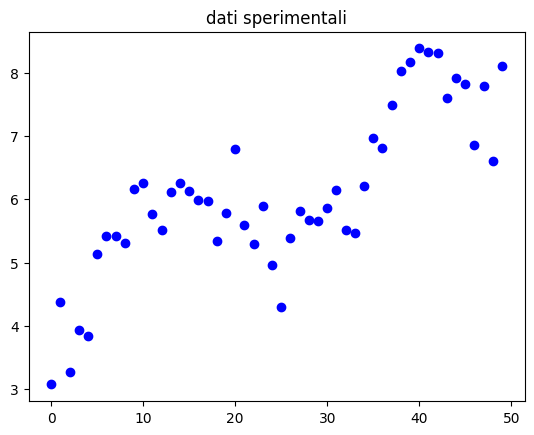

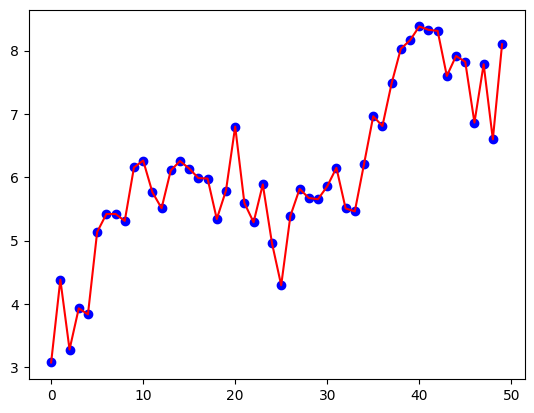

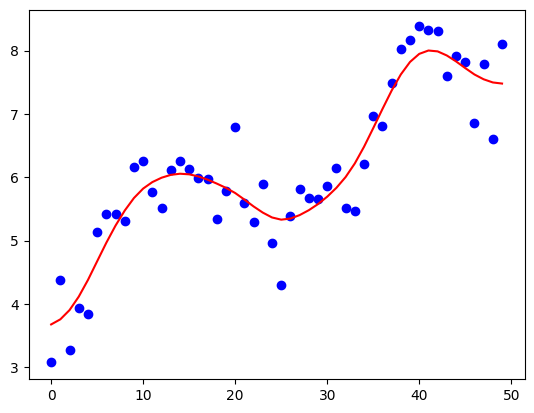

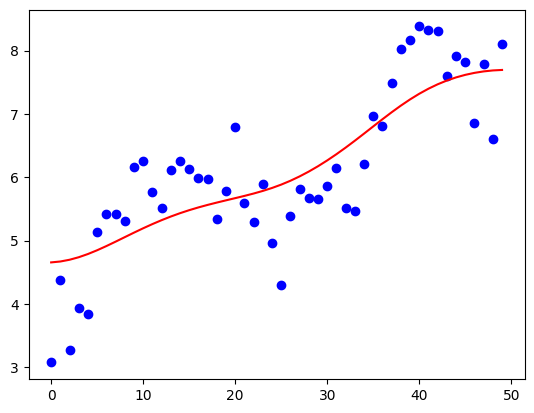

In [6]:
# Hodrick-Prescott: approssimare dei dati che hanno un andamento 
#                   sostanzialmente lineare a tratti
stderr = 0.5
br = np.concatenate((3.0+3.0*np.arange(0.1,1.1,0.1) + stderr*np.random.randn(10), \
                     6.0+0.1*np.arange(0.1,1.1,0.1) + stderr*np.random.randn(10), \
                     6.1-1.1*np.arange(0.1,1.1,0.1) + stderr*np.random.randn(10), \
                     5.0+3.0*np.arange(0.1,1.1,0.1) + stderr*np.random.randn(10), \
                     8.0+0.0*np.arange(0.1,1.1,0.1) + stderr*np.random.randn(10)))
N = len(br)
plt.figure(1), plt.plot(br,'bo'); plt.title('dati sperimentali'); plt.show()
br = np.atleast_2d(br).T

d0 = -2.0 + np.zeros(N)
d1 = 1.0 + np.zeros(N-1)
D = np.diag(d0) + np.diag(d1,-1) + np.diag(d1,1)
D[0,0] = -1.0
D[N-1,N-1] = -1.0

lam = 0
x_hp = np.linalg.solve( np.eye(N)+2*lam*D.T@D , br)
plt.plot(br,'bo'); plt.plot(x_hp,'r-'); plt.show()

lam = 20
x_hp = np.linalg.solve( np.eye(N)+2*lam*D.T@D , br)
plt.plot(br,'bo'); plt.plot(x_hp,'r-'); plt.show()

lam = 1000
x_hp = np.linalg.solve( np.eye(N)+2*lam*D.T@D , br)
plt.plot(br,'bo'); plt.plot(x_hp,'r-'); plt.show()